# Import Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
import psutil
warnings.filterwarnings("ignore")

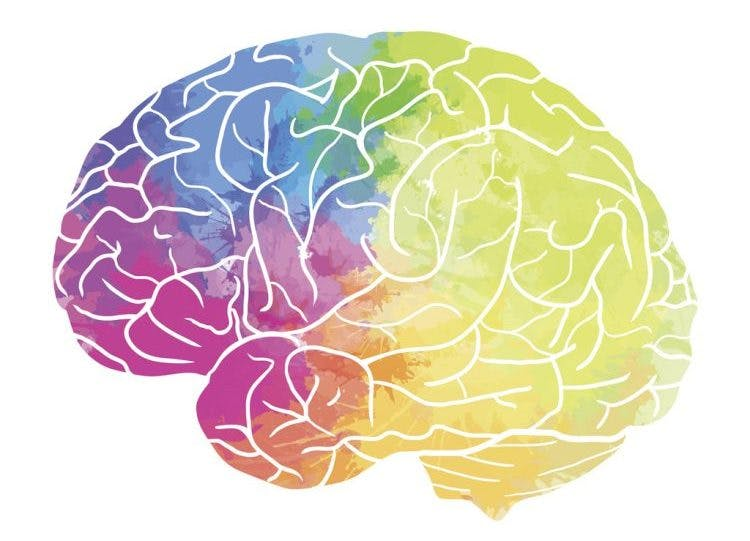

In [1]:
from IPython.display import display, Image
display(Image(filename='stroke.jpg'))


# Read Data

In [4]:
df=pd.read_csv("Stroke.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [6]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [7]:
df.shape

(43400, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


#### Checking for any null values

In [5]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

#### Handling Missing Values

In [6]:
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace=True)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [7]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Checking for any duplicates

In [13]:
df.duplicated().sum()

0

#### Encoding Categorical Data

In [8]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])

In [9]:
df= pd.get_dummies(df, columns = ['work_type', 'smoking_status'])

#### Data after encoding

In [16]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,30669,1,3.0,0,0,0,0,95.12,18.0,0,0,0,0,0,1,0,1,0
1,30468,1,58.0,1,0,1,1,87.96,39.2,0,0,0,1,0,0,0,1,0
2,16523,0,8.0,0,0,0,1,110.89,17.6,0,0,0,1,0,0,0,1,0
3,56543,0,70.0,0,0,1,0,69.04,35.9,0,0,0,1,0,0,1,0,0
4,46136,1,14.0,0,0,0,0,161.28,19.1,0,0,1,0,0,0,0,1,0


#### Splitting data

In [10]:
X= df.drop(['stroke','id'],axis=1)
y= df.stroke
X.shape,y.shape

((43400, 16), (43400,))

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

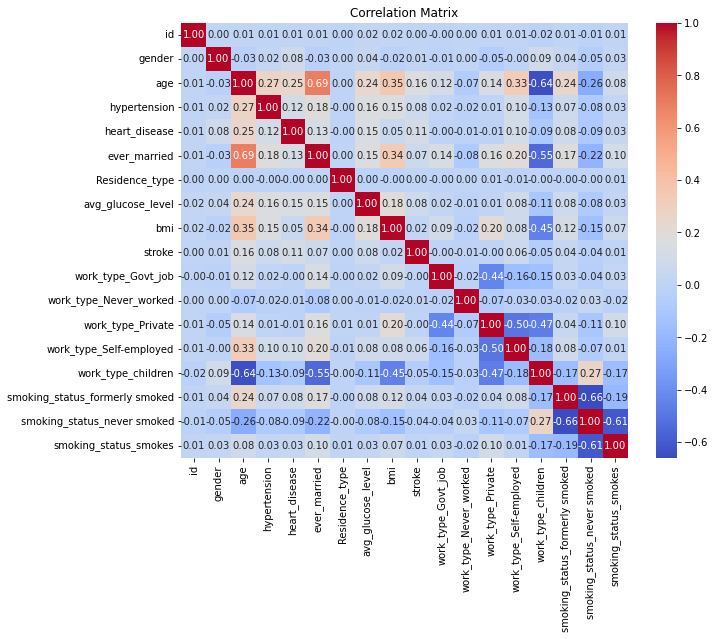

In [16]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Apply Resampling  ( undersampling then oversampling )

In [22]:
#pip install imblearn

# Undersampling

In [17]:
undersampler = RandomUnderSampler(random_state=0)
X_resample, y_resample = undersampler.fit_resample(X_train, y_train)
print("After undersampling:", sorted(Counter(y_resample).items()), y_resample.shape)

After undersampling: [(0, 554), (1, 554)] (1108,)


### _______________________Random Forest Classifier_______________________

Train Random Forest on undersampled data:

In [24]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resample, y_resample)
y_pred_rf_undersampled = rf.predict(X_test)

 Evaluate the model


In [25]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
rf_auc = roc_auc_score(y_test,  y_pred_rf_undersampled)
print("Random Forest Classifier (Undersampled Data):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_undersampled))
print(classification_report(y_test, y_pred_rf_undersampled))
print(" AUC:", rf_auc)

Random Forest Classifier (Undersampled Data):
Accuracy: 0.7428571428571429
              precision    recall  f1-score   support

           0       0.99      0.74      0.85     12791
           1       0.05      0.76      0.09       229

    accuracy                           0.74     13020
   macro avg       0.52      0.75      0.47     13020
weighted avg       0.98      0.74      0.84     13020

 AUC: 0.7511893426703206


### _______________________BaggingClassifier_______________________

Train Bagging Classifier on undersampled data:

In [26]:
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=0)
bagging_clf.fit(X_resample, y_resample)
y_pred_bagging = bagging_clf.predict(X_test)

Evaluate the model

In [27]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
bg_auc = roc_auc_score(y_test, y_pred_bagging)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Bagging Classification Report:\n", classification_report(y_test, y_pred_bagging))
print(" AUC:", bg_auc)

Bagging Accuracy: 0.743778801843318
Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85     12791
           1       0.05      0.75      0.09       229

    accuracy                           0.74     13020
   macro avg       0.52      0.75      0.47     13020
weighted avg       0.98      0.74      0.84     13020

 AUC: 0.7452254741068964


### _______________________BoostingClassifier_______________________

Train Boosting Classifier on undersampled data:

In [28]:
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=0)
ada_clf.fit(X_resample, y_resample)
y_pred_ada = ada_clf.predict(X_test)

Evaluate the model

In [29]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
ada_auc = roc_auc_score(y_test,  y_pred_ada)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ada))
print(" AUC:", ada_auc)

AdaBoost Accuracy: 0.7182795698924731
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.72      0.83     12791
           1       0.04      0.66      0.08       229

    accuracy                           0.72     13020
   macro avg       0.52      0.69      0.46     13020
weighted avg       0.97      0.72      0.82     13020

 AUC: 0.691505592599054


# Oversampling

In [30]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("After oversampling:", sorted(Counter(y_resampled).items()), y_resampled.shape)


After oversampling: [(0, 29826), (1, 29826)] (59652,)


### _______________________Random Forest Classifier_______________________

Train Random Forest on oversampled data:

In [31]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf_oversampled = rf.predict(X_test)

Evaluate the model

In [32]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
rf_auc = roc_auc_score(y_test,  y_pred_rf_oversampled)
print("Random Forest Classifier (Oversampled Data):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_oversampled))
print(classification_report(y_test, y_pred_rf_oversampled))
print(" AUC:", rf_auc)

Random Forest Classifier (Oversampled Data):
Accuracy: 0.9755760368663594
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12791
           1       0.09      0.04      0.06       229

    accuracy                           0.98     13020
   macro avg       0.54      0.52      0.52     13020
weighted avg       0.97      0.98      0.97     13020

 AUC: 0.5179641526059365


### _______________________BaggingClassifier_______________________

Train DecisionTreeClassifier on oversampled data:

In [33]:
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=0)
bagging_clf.fit(X_resampled, y_resampled)
y_pred_bagging = bagging_clf.predict(X_test)

Evaluate the model

In [34]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
bg_auc = roc_auc_score(y_test, y_pred_bagging)
y_pred_bagging = bagging_clf.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Bagging Classification Report:\n", classification_report(y_test, y_pred_bagging))
print(" AUC:", bg_auc)

Bagging Accuracy: 0.9725806451612903
Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     12791
           1       0.10      0.07      0.08       229

    accuracy                           0.97     13020
   macro avg       0.54      0.53      0.53     13020
weighted avg       0.97      0.97      0.97     13020

 AUC: 0.5293055399555978


### _______________________BoostingClassifier_______________________

Train Gradient Boosting on oversampled data:

In [35]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_resampled, y_resampled)
y_pred_gb_oversampled = gb.predict(X_test)

Evaluate the model


In [36]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
gb_auc = roc_auc_score(y_test,  y_pred_gb_oversampled)

print("Gradient Boosting Classifier (Oversampled Data):")
print("Accuracy:", accuracy_score(y_test, y_pred_gb_oversampled))
print(classification_report(y_test, y_pred_gb_oversampled))

print(" AUC:", gb_auc)

Gradient Boosting Classifier (Oversampled Data):
Accuracy: 0.9452380952380952
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     12791
           1       0.06      0.15      0.09       229

    accuracy                           0.95     13020
   macro avg       0.52      0.56      0.53     13020
weighted avg       0.97      0.95      0.96     13020

 AUC: 0.556131511683126


____________________________________________________________________________________________________________________

# Optimizating The Models 

#### Optimize  Bagging Classifier on undersampled data

In [37]:
# Define the parameter grid for BaggingClassifier
bagging_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}

# Initialize the BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

# Perform Grid Search with Cross-Validation
bagging_grid_search = GridSearchCV(bagging_clf, bagging_param_grid, cv=5, scoring='accuracy', n_jobs=1)  # n_jobs=1 to reduce parallelism
bagging_grid_search.fit(X_resample, y_resample)

# Get the best estimator
best_bagging_clf = bagging_grid_search.best_estimator_

# Predict and evaluate on the test data
y_pred_bagging = best_bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)

#AUC
bagging_classification_report = classification_report(y_test, y_pred_bagging)
bagging_auc = roc_auc_score(y_test, best_bagging_clf.predict_proba(X_test)[:, 1])


print("Optimized Bagging Accuracy:", bagging_accuracy)
print("Optimized Bagging Classification Report:\n", bagging_classification_report)
print("Optimized Bagging AUC:", bagging_auc)




Optimized Bagging Accuracy: 0.7481566820276497
Optimized Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85     12791
           1       0.05      0.76      0.10       229

    accuracy                           0.75     13020
   macro avg       0.52      0.75      0.47     13020
weighted avg       0.98      0.75      0.84     13020

Optimized Bagging AUC: 0.8295248194093896


#### Optimize Boosting Classifier on undersampled data

In [38]:
# Define the parameter grid for AdaBoostClassifier
adaboost_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Initialize the AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

# Perform Grid Search with Cross-Validation
adaboost_grid_search = GridSearchCV(adaboost_clf, adaboost_param_grid, cv=5, scoring='accuracy', n_jobs=1)  # n_jobs=1 to reduce parallelism
adaboost_grid_search.fit(X_resample, y_resample)

# Get the best estimator
best_adaboost_clf = adaboost_grid_search.best_estimator_

# Predict and evaluate on the test data
y_pred_adaboost = best_adaboost_clf.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost)

# AUC
adaboost_classification_report = classification_report(y_test, y_pred_adaboost)
adaboost_auc = roc_auc_score(y_test, best_adaboost_clf.predict_proba(X_test)[:, 1])

print("Optimized AdaBoost Accuracy:", adaboost_accuracy)
print("Optimized AdaBoost Classification Report:\n", adaboost_classification_report)
print("Optimized AdaBoost AUC:", adaboost_auc)


Optimized AdaBoost Accuracy: 0.7182795698924731
Optimized AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.72      0.83     12791
           1       0.04      0.66      0.08       229

    accuracy                           0.72     13020
   macro avg       0.52      0.69      0.46     13020
weighted avg       0.97      0.72      0.82     13020

Optimized AdaBoost AUC: 0.691505592599054


_____________________________________________________________________________

#### Optimize Bagging Classifier on oversampled data

In [40]:
# Define the parameter grid for BaggingClassifier
bagging_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}

# Initialize the BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

# Perform Grid Search with Cross-Validation
bagging_grid_search = GridSearchCV(bagging_clf, bagging_param_grid, cv=5, scoring='accuracy', n_jobs=1)  # n_jobs=1 to reduce parallelism
bagging_grid_search.fit(X_resampled, y_resampled)

# Get the best estimator
best_bagging_clf = bagging_grid_search.best_estimator_

# Predict and evaluate on the test data
y_pred_bagging = best_bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)

# AUC
bagging_classification_report = classification_report(y_test, y_pred_bagging)
bagging_auc = roc_auc_score(y_test, best_bagging_clf.predict_proba(X_test)[:, 1])

print("Optimized Bagging Accuracy:", bagging_accuracy)
print("Optimized Bagging Classification Report:\n", bagging_classification_report)
print("Optimized Bagging AUC:", bagging_auc)

Optimized Bagging Accuracy: 0.9816436251920123
Optimized Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     12791
           1       0.14      0.01      0.02       229

    accuracy                           0.98     13020
   macro avg       0.56      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020

Optimized Bagging AUC: 0.761392170190626


#### Optimize Boosting Classifier on oversampled data

In [41]:
# Define the parameter grid for GradientBoostingClassifier
gradientboost_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Initialize the GradientBoostingClassifier
gradientboost_clf = GradientBoostingClassifier(random_state=0)

# Perform Grid Search with Cross-Validation
gradientboost_grid_search = GridSearchCV(gradientboost_clf, gradientboost_param_grid, cv=5, scoring='accuracy', n_jobs=1)  # n_jobs=1 to reduce parallelism
gradientboost_grid_search.fit(X_resampled, y_resampled)

# Get the best estimator
best_gradientboost_clf = gradientboost_grid_search.best_estimator_

# Predict and evaluate on the test data
y_pred_gradientboost = best_gradientboost_clf.predict(X_test)
gradientboost_accuracy = accuracy_score(y_test, y_pred_gradientboost)

# AUC
gradientboost_classification_report = classification_report(y_test, y_pred_gradientboost)
gradientboost_auc = roc_auc_score(y_test, best_gradientboost_clf.predict_proba(X_test)[:, 1])

print("Optimized GradientBoosting Accuracy:", gradientboost_accuracy)
print("Optimized GradientBoosting Classification Report:\n", gradientboost_classification_report)
print("Optimized GradientBoosting AUC:", gradientboost_auc)

Optimized GradientBoosting Accuracy: 0.9790322580645161
Optimized GradientBoosting Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     12791
           1       0.08      0.02      0.03       229

    accuracy                           0.98     13020
   macro avg       0.53      0.51      0.51     13020
weighted avg       0.97      0.98      0.97     13020

Optimized GradientBoosting AUC: 0.7788111113880223
